In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#1-1 読込、表示

testpath='/content/drive/MyDrive/Colab Notebooks/signate/bank_target/test.csv'
trainpath='/content/drive/MyDrive/Colab Notebooks/signate/bank_target/train.csv'
samplepath='/content/drive/MyDrive/Colab Notebooks/signate/bank_target/submit_sample.csv'
testdata=pd.read_csv(testpath)
traindata=pd.read_csv(trainpath)
sampledata=pd.read_csv(samplepath)

In [ ]:
print(traindata.columns.tolist())
print(f"\n合計カラム数: {len(traindata.columns)}")
print("\n\nトレイン\n",traindata.head(10))
print(traindata.tail(10))

['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

合計カラム数: 18


トレイン
    id  age            job  marital  education default  balance housing loan  \
0   1   39    blue-collar  married  secondary      no     1756     yes   no   
1   2   51   entrepreneur  married    primary      no     1443      no   no   
2   3   36     management   single   tertiary      no      436      no   no   
3   4   63        retired  married  secondary      no      474      no   no   
4   5   31     management   single   tertiary      no      354      no   no   
5   6   29    blue-collar   single  secondary      no      260     yes   no   
6   7   37       services  married  secondary      no       52     yes   no   
7   8   32     technician   single  secondary      no      230     yes   no   
8   9   31         admin.   single  secondary      no        0     yes   no   
9  10   32  sel

下処理（変換）

グループ層化:age,balance,day,duration  
数値化（リスト）:job,education,contact,poutcome  
数値化（0，1):marital,default,housing,loan  
数値化（その他):month,pdays  




In [ ]:
#1-2　欠損値の確認

print("--- NaNの数 ---")
print(traindata.isnull().sum())

print("\n--- 'unknown' の数 ---")
cat_cols = traindata.select_dtypes(include='object').columns
for col in cat_cols:
    unknown_count = (traindata[col] == 'unknown').sum()
    print(f"{col}: {unknown_count}")

cat_cols = traindata.select_dtypes(include='object').columns

unknown_stats = []
for col in cat_cols:
    count = (traindata[col] == 'unknown').sum()
    ratio = count / len(traindata) * 100
    unknown_stats.append([col, count, f"{ratio:.2f}%"])

unknown_df = pd.DataFrame(unknown_stats, columns=['Column', 'Unknown Count', 'Percentage'])
print(unknown_df)

--- NaNの数 ---
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

--- 'unknown' の数 ---
job: 178
marital: 0
education: 1137
default: 0
housing: 0
loan: 0
contact: 7861
month: 0
poutcome: 22150
      Column  Unknown Count Percentage
0        job            178      0.66%
1    marital              0      0.00%
2  education           1137      4.19%
3    default              0      0.00%
4    housing              0      0.00%
5       loan              0      0.00%
6    contact           7861     28.98%
7      month              0      0.00%
8   poutcome          22150     81.65%


欠損値なし  
UNKNOWNの処理については要検討

In [ ]:
print(traindata[traindata["job"] == "unknown"].head(20))


        id  age      job  marital  education default  balance housing loan  \
74      75   45  unknown  married    unknown      no    19706     yes   no   
84      85   41  unknown   single   tertiary      no     1567      no   no   
542    543   27  unknown   single   tertiary      no     6421      no   no   
546    547   36  unknown   single    primary      no     3415      no   no   
551    552   34  unknown  married    unknown      no     4535      no   no   
670    671   26  unknown   single  secondary      no     3247      no   no   
731    732   46  unknown  married    primary      no      285      no   no   
909    910   39  unknown  married    primary      no     6999      no   no   
938    939   47  unknown  married    unknown      no      270      no   no   
992    993   54  unknown  married  secondary      no     2206      no   no   
1114  1115   56  unknown  married    unknown      no      778      no   no   
1118  1119   37  unknown   single  secondary      no       57   

In [ ]:
print("\n\n",traindata[traindata["education"] == "unknown"].head())
target_data = traindata[(traindata["age"] < 15) & (traindata["education"] == "unknown")]
target_data



     id  age          job   marital education default  balance housing loan  \
27  28   46     services  divorced   unknown      no      973      no   no   
31  32   52       admin.    single   unknown      no     2227      no   no   
67  68   35  blue-collar   married   unknown      no     -205     yes   no   
74  75   45      unknown   married   unknown      no    19706     yes   no   
80  81   53     services   married   unknown      no     2009      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  y  
27  cellular    2   feb       297         1     -1         0  unknown  0  
31  cellular   24   feb       242         2     -1         0  unknown  1  
67   unknown   23   may       147        14     -1         0  unknown  0  
74  cellular    3   feb       419         3     -1         0  unknown  0  
80  cellular   16   jun       250         1     -1         0  unknown  0  


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


job：残高やその他属性から推測困難のため補完せず  
educationの15歳未満にUNKNOWNはいないため補完不要  
contact、poutcome　補完不要  

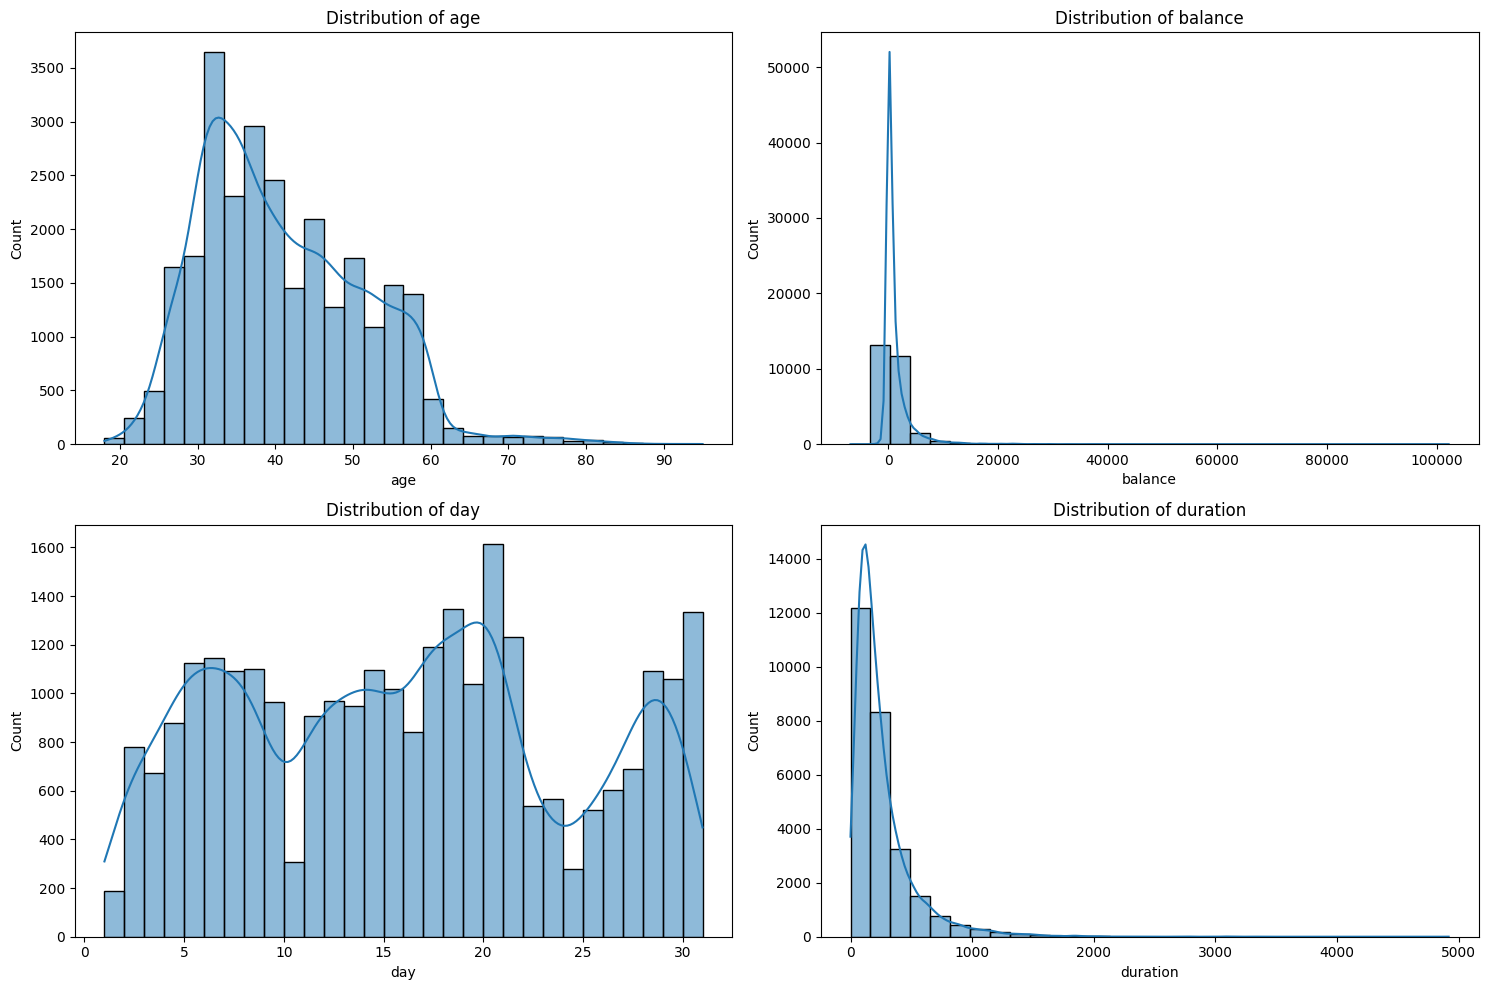

In [ ]:
#2-1　下処理　グループ層の可視化
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'balance', 'day', 'duration']

# グラフの表示エリアを作成
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    # ヒストグラムを表示
    sns.histplot(traindata[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

ヒストグラムの分布より層化は以下のとおり行う。    
１年齢　20未満：0、20代：1、30～50：2、51～60：3  
２日付　５日区切りで順に1,2,3,4,5,6(31日含む)  
３残高と通話時間　対数変換  

In [ ]:
#2-2　下処理(グループ化:age,balance,day,duration)

def age_binning(x):
    if x < 20:return 0
    elif x < 30:return 1
    elif x < 50:return 2
    elif x < 60:return 3
    else:return 4

def day_binning(x):
    if x <= 5: return 0
    elif x <= 10: return 1
    elif x <= 15: return 2
    elif x <= 20: return 3
    elif x <= 25: return 4
    else: return 5

for df in [traindata, testdata]:
    df['age_bin'] = df['age'].apply(age_binning)
    df['day_bin'] = df['day'].apply(day_binning)

all_min = min(traindata['balance'].min(), testdata['balance'].min())
for df in [traindata, testdata]:
    if all_min < 0:
        df['balance_log'] = np.log1p(df['balance'] - all_min)
    else:
        df['balance_log'] = np.log1p(df['balance'])
    df['duration_log'] = np.log1p(df['duration'])

print("--- traindataの準備完了 ---")
print(traindata[['age_bin', 'day_bin', 'balance_log', 'duration_log']].head())

print("\n--- testdataの準備完了 ---")
print(testdata[['age_bin', 'day_bin', 'balance_log', 'duration_log']].head())

--- traindataの準備完了 ---
   age_bin  day_bin  balance_log  duration_log
0        2        0     9.187686      6.845880
1        3        3     9.155145      5.153292
2        2        2     9.042632      6.342121
3        4        4     9.047115      6.049733
4        2        5     9.032887      6.220590

--- testdataの準備完了 ---
   age_bin  day_bin  balance_log  duration_log
0        2        0     9.110299      7.166266
1        2        3     9.041448      6.937314
2        2        0     8.915701      3.295837
3        2        5     8.928508      4.532599
4        2        5     8.997395      6.003887


In [ ]:
#2-3　下処理　数値化（リスト）:marital,job,education,contact,poutcome

from sklearn.preprocessing import LabelEncoder

cat_cols = ['marital','job', 'education', 'contact', 'poutcome']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([traindata[col], testdata[col]]))

    traindata[col] = le.transform(traindata[col])
    testdata[col] = le.transform(testdata[col])

print(traindata[cat_cols].head())

   marital  job  education  contact  poutcome
0        1    1          1        0         3
1        1    2          0        0         3
2        2    4          2        0         0
3        1    5          1        0         3
4        2    4          2        0         2


In [ ]:
#2-4　下処理　数値化（0，1):default,housing,loan

binary_map = {'yes': 1, 'no': 0}

for df in [traindata, testdata]:
    df['default'] = df['default'].map(binary_map)
    df['housing'] = df['housing'].map(binary_map)
    df['loan'] = df['loan'].map(binary_map)

print(traindata[[ 'default', 'housing', 'loan']].head())


   default  housing  loan
0        0        1     0
1        0        0     0
2        0        0     0
3        0        0     0
4        0        0     0


In [ ]:
#2-5　下処理　数値化（その他):month,pdays

month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
for df in [traindata, testdata]:
    if df['month'].dtype == 'object':
        df['month'] = df['month'].map(month_map)

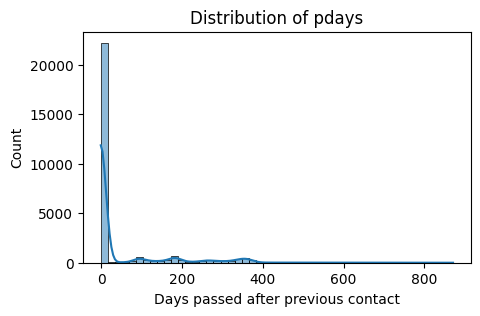

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(traindata['pdays'], bins=50, kde=True)
plt.title('Distribution of pdays')
plt.xlabel('Days passed after previous contact')
plt.ylabel('Count')
plt.show()

pdays
-1，0，1～200，201～400，401～でグループ化

In [ ]:
def pdays_binning(x):
    if x == -1: return 0
    elif x == 0: return 1
    elif x <= 200: return 2
    elif x <= 400: return 3
    else: return 4

for df in [traindata, testdata]:
    df['pdays_bin'] = df['pdays'].apply(pdays_binning)

print("pdaysのグループ化が完了しました！")
print(traindata['pdays_bin'].value_counts().sort_index())

pdaysのグループ化が完了しました！
pdays_bin
0    22146
2     2568
3     2280
4      134
Name: count, dtype: int64


In [ ]:
#3-1　学習モデル構築（AUC）
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1. 使う列を厳選する（加工した後の列を指定）
features = [
    'age_bin', 'job', 'marital', 'education', 'default',
    'balance_log', 'housing', 'loan', 'contact', 'day_bin',
    'month', 'duration_log', 'campaign', 'pdays_bin', 'previous', 'poutcome'
]

X = traindata[features]
y = traindata['y']

# 2. 学習用データをさらに「訓練用」と「検証用（答え合わせ用）」に分ける
# test_size=0.2 は全体の20%を答え合わせに使うという意味です
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. LightGBM専用のデータ形式に変換
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val, reference=train_set)

# 4. パラメータの設定（最初は標準的なものでOK）
params = {
    'objective': 'binary',    # 0か1かを当てる
    'metric': 'auc',          # 精度を測る指標（AUC）
    'verbosity': -1,
    'boosting_type': 'gbdt',
}

# 5. 学習開始！
model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, val_set],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=100)] # 伸びなくなったら止める
)

# 6. 検証データで精度を確認
y_pred = model.predict(X_val)
score = roc_auc_score(y_val, y_pred)
print(f"検証データのAUCスコア: {score:.4f}")

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	training's auc: 0.958172	valid_1's auc: 0.937099
検証データのAUCスコア: 0.9371


In [ ]:
#3-2　学習モデル構築（ランダムフォレスト）
from sklearn.ensemble import RandomForestClassifier

# 1. モデルの作成
# n_estimators: 作成する木の数（多いほど安定しますが時間がかかります）
# max_depth: 木の深さ（深すぎると丸暗記＝過学習してしまいます）
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 2. 学習
rf_model.fit(X_train, y_train)

# 3. 予測（確率は [:, 1] で「1（成約）になる確率」を取り出します）
y_pred_rf = rf_model.predict_proba(X_val)[:, 1]

# 4. スコア表示
rf_score = roc_auc_score(y_val, y_pred_rf)
print(f"ランダムフォレストのAUCスコア: {rf_score:.4f}")

ランダムフォレストのAUCスコア: 0.9272


In [ ]:
#3-3　学習モデル構築（XGBoost）
import xgboost as xgb

# XGBoost専用のデータ形式
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params_xgb = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.1, # 学習率
}

# 学習
xgb_model = xgb.train(
    params_xgb,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=100,
    verbose_eval=50
)

# 予測
y_pred_xgb = xgb_model.predict(dval)
print(f"XGBoostのAUC: {roc_auc_score(y_val, y_pred_xgb):.4f}")

[0]	train-auc:0.89712	val-auc:0.89594
[50]	train-auc:0.95335	val-auc:0.93198
[100]	train-auc:0.96583	val-auc:0.93232
[150]	train-auc:0.97283	val-auc:0.93143
[158]	train-auc:0.97385	val-auc:0.93122
XGBoostのAUC: 0.9312


In [ ]:
#3-4　学習モデル構築（ロジスティック回帰）
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 回帰モデルは「データの大きさ（スケール）」に敏感なので標準化が必要
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict_proba(X_val_scaled)[:, 1]
print(f"ロジスティック回帰のAUC: {roc_auc_score(y_val, y_pred_lr):.4f}")

ロジスティック回帰のAUC: 0.8832


In [ ]:
#3-5　学習モデル構築（アンサンブル）

final_blend = (
    y_pred * 0.4 +
    y_pred_xgb * 0.3 +
    y_pred_rf * 0.2 +
    y_pred_lr * 0.1
)

blend_score = roc_auc_score(y_val, final_blend)
print(f"4種盛りアンサンブルのAUCスコア: {blend_score:.4f}")

4種盛りアンサンブルのAUCスコア: 0.9361


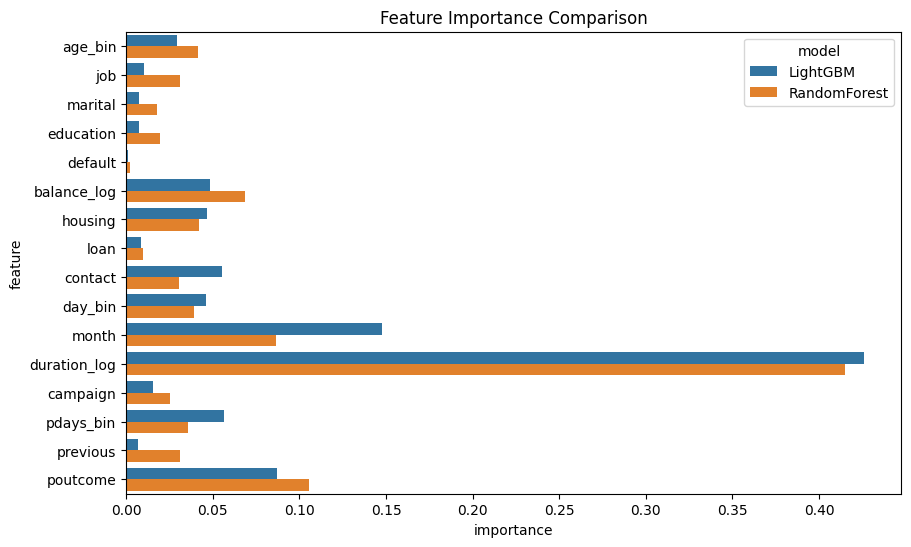

In [ ]:
#4　寄与度の確認

# 1. 各モデルの重要度を抽出
fi_lgb = pd.DataFrame({'feature': features, 'importance': model.feature_importance(importance_type='gain'), 'model': 'LightGBM'})
fi_xgb = pd.DataFrame({'feature': features, 'importance': list(xgb_model.get_score(importance_type='gain').values()), 'model': 'XGBoost'})
fi_rf = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_, 'model': 'RandomForest'})

# 2. 比較のために正規化（合計を1にする）
for df in [fi_lgb, fi_xgb, fi_rf]:
    df['importance'] = df['importance'] / df['importance'].sum()

# 3. グラフ表示
plt.figure(figsize=(10, 6))
combined_fi = pd.concat([fi_lgb, fi_rf]) # 今回は代表してLGBMとRFを比較
sns.barplot(x='importance', y='feature', hue='model', data=combined_fi)
plt.title('Feature Importance Comparison')
plt.show()

修正事項
duration_logは寄与度が0.4と最も高いが因果が逆になっているため要削除
（成約したから説明等で長いのであって、電話時間を無理に伸ばすように改善しても成約率の上昇にはつながらないため）

In [ ]:
#5-1　学習モデル（AUC)　duration_log抜き
features_no_duration = [f for f in features if 'duration' not in f]

# 2. データの再作成
X_train_nd = X_train[features_no_duration]
X_val_nd = X_val[features_no_duration]

# 3. LightGBMで再学習
model_nd = lgb.train(
    params,
    lgb.Dataset(X_train_nd, label=y_train),
    num_boost_round=1000,
    valid_sets=[lgb.Dataset(X_val_nd, label=y_val)],
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

# 4. スコア確認
y_pred_nd = model_nd.predict(X_val_nd)
print(f"duration抜きのAUCスコア: {roc_auc_score(y_val, y_pred_nd):.4f}")

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.791491
duration抜きのAUCスコア: 0.7915


In [ ]:
#5-2　学習モデル（ランダムフォレスト)　duration_log抜き

from sklearn.ensemble import RandomForestClassifier

# 1. duration抜きの特徴量でモデルを定義
# (過学習を防ぐため、少し深さを制限した max_depth=10 程度が実務的です)
rf_model_nd = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# 2. 学習（X_train_nd は先ほど作成した duration 抜きのデータ）
rf_model_nd.fit(X_train_nd, y_train)

# 3. 検証データでの精度確認
y_pred_rf_nd = rf_model_nd.predict_proba(X_val_nd)[:, 1]
rf_auc_nd = roc_auc_score(y_val, y_pred_rf_nd)

print(f"RandomForest(duration抜き)のAUCスコア: {rf_auc_nd:.4f}")

RandomForest(duration抜き)のAUCスコア: 0.7773


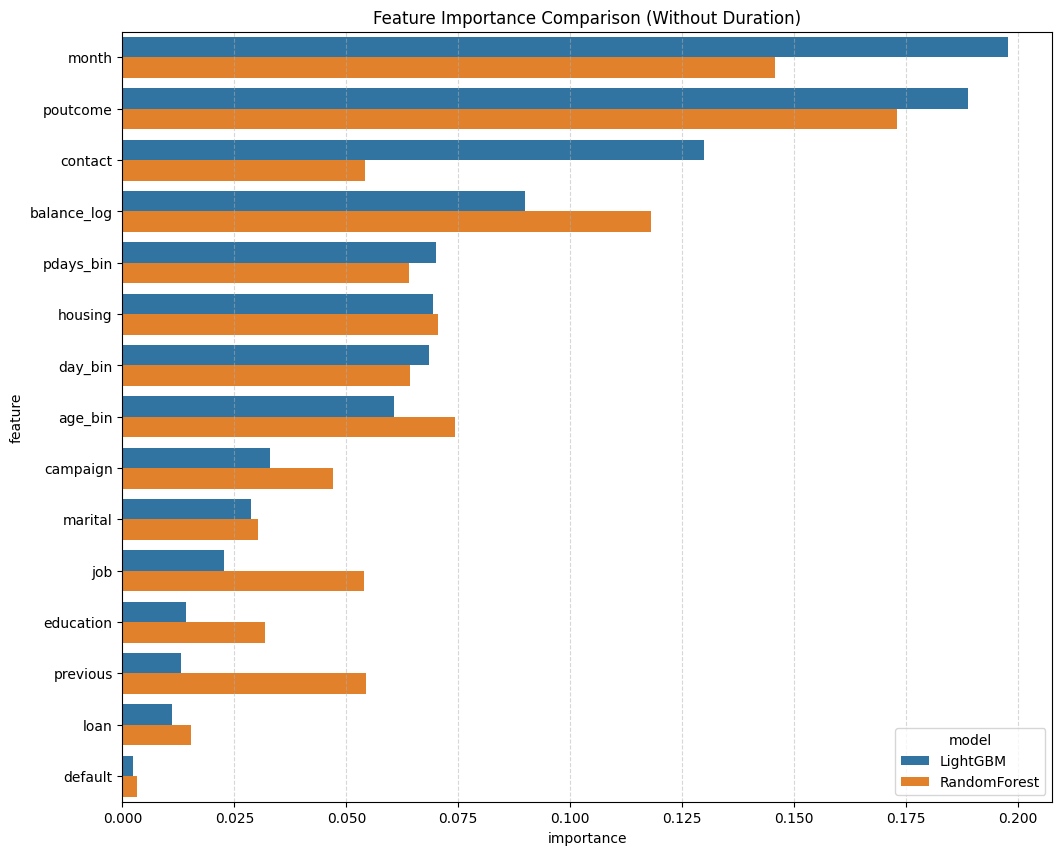

In [ ]:
#6　寄与度の確認

# 1. 各モデルの重要度を抽出
fi_lgb_nd = pd.DataFrame({
    'feature': features_no_duration,
    'importance': model_nd.feature_importance(importance_type='gain'),
    'model': 'LightGBM'
})

fi_rf_nd = pd.DataFrame({
    'feature': features_no_duration,
    'importance': rf_model_nd.feature_importances_,
    'model': 'RandomForest'
})

# 2. 正規化（合計を1にして比較しやすくする）
for df in [fi_lgb_nd, fi_rf_nd]:
    df['importance'] = df['importance'] / df['importance'].sum()

# 3. グラフ表示
plt.figure(figsize=(12, 10))
combined_fi_nd = pd.concat([fi_lgb_nd, fi_rf_nd])

# 重要度の高い順に並び替えて表示
order = fi_lgb_nd.sort_values('importance', ascending=False)['feature']

sns.barplot(x='importance', y='feature', hue='model', data=combined_fi_nd, order=order)
plt.title('Feature Importance Comparison (Without Duration)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# 1. テストデータからも duration を除外（学習時と同じ特徴量にする）
X_test_nd = testdata[features_no_duration]

# 2. 予測（LightGBMの duration抜きモデルを使用）
# 確率（1になる確率）を算出します
test_pred_nd = model_nd.predict(X_test_nd)

# 3. 提出用データの整形
# idはテストデータのものをそのまま使い、yに予測確率を入れます
submission = pd.DataFrame({
    'id': testdata['id'],
    'y': test_pred_nd
})

# 4. CSVとして保存
# ヘッダーなし、インデックスなしの形式が一般的です
submission.to_csv('submission_no_duration.csv', index=False, header=False)

print("提出用ファイル 'submission_no_duration.csv' が作成されました！")

提出用ファイル 'submission_no_duration.csv' が作成されました！
